In [1]:
from warnings import warn

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config IntlineBackend.figure_format='svg'
#warnings.filterwarnings('ignore')

# Women’s Clothing E-Commerce

This is a women's clothing e-commerce dataset that revolves around customer buying behavior in women's clothing and the most recommended clothing by customers.

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Rating**: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

### Questions:
- What are the most rated product name ?
- What is the mean age for a product reviews ?
- What is the most number of products?




### Steps of the project as follows:
1. Load Dataset
2. Explore Dataset
3. Cleaning Dataset
4. Analysis and Visualization


## Load Dataset

In [3]:
# To raed the dataset 
df=pd.read_csv("//Users//vigneshwarank//Desktop//Analysis-of-E-commerce-for-women-s-clothing-EDA-main//Data//Data.csv")

## Explore Dataset

In [4]:
# To read the 5 first row 
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Unnamed: 11,Unnamed: 12
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,NaN,NaN
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,NaN,NaN
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,NaN,NaN
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,NaN,NaN
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,NaN,`


In [5]:
df.tail(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Unnamed: 11,Unnamed: 12
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,NaN,NaN
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,NaN,NaN
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,NaN,NaN
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,NaN,NaN
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses,NaN,NaN


In [6]:
# we can see there are null values
# columns with numerical values are type int64, float4 , object
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               23486 non-null  int64  
 1   Clothing ID              23486 non-null  int64  
 2   Age                      23486 non-null  int64  
 3   Title                    19676 non-null  object 
 4   Review Text              22641 non-null  object 
 5   Rating                   23486 non-null  int64  
 6   Recommended IND          23486 non-null  int64  
 7   Positive Feedback Count  23486 non-null  int64  
 8   Division Name            23472 non-null  object 
 9   Department Name          23472 non-null  object 
 10  Class Name               23472 non-null  object 
 11  Unnamed: 11              0 non-null      float64
 12  Unnamed: 12              1 non-null      object 
dtypes: float64(1), int64(6), object(6)
memory usage: 2.3+ MB


In [7]:
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Unnamed: 11
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,0.0
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936,NaN
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202,NaN
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,NaN
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000,NaN
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000,NaN
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000,NaN
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000,NaN


In [8]:
df.describe(include='object')

,Title,Review Text,Division Name,Department Name,Class Name,Unnamed: 12
count,19676,22641,23472,23472,23472,1
unique,13994,22634,3,6,20,1
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses,`
freq,136,3,13850,10468,6319,1


In [9]:
# view all columns of the dataframe
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name ', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

## Cleaning Dataset
In this step, we seek to clean the data, identify the rows and columns that contain an missing value , and delete the rows that we do not need.

In [10]:
#to drop unimportant columns and rows
df.drop(['Unnamed: 0','Title','Review Text','Unnamed: 11','Unnamed: 12','Positive Feedback Count' ], axis='columns', inplace=True)

In [11]:
# this show all columns after droped
df.head()

,Clothing ID,Age,Rating,Recommended IND,Division Name,Department Name,Class Name
0,767,33,4,1,Initmates,Intimate,Intimates
1,1080,34,5,1,General,Dresses,Dresses
2,1077,60,3,0,General,Dresses,Dresses
3,1049,50,5,1,General Petite,Bottoms,Pants
4,847,47,5,1,General,Tops,Blouses


In [12]:
# Check null values 
df.isnull().sum()

Clothing ID         0
Age                 0
Rating              0
Recommended IND     0
Division Name      14
Department Name    14
Class Name         14
dtype: int64

Text(0.5, 1.0, 'Missing Values per Feature')

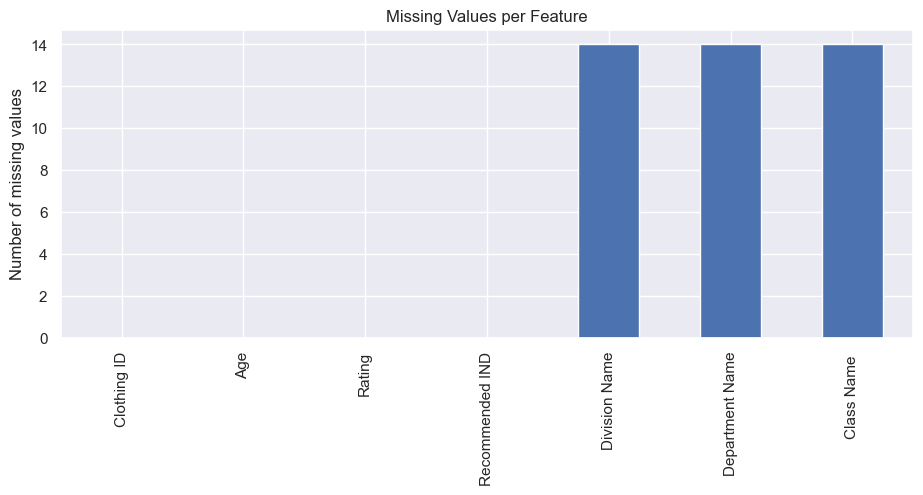

In [13]:
#the amount of missing values per feature
sns.set(rc={'figure.figsize':(11,4)})
pd.isnull(df).sum().plot(kind='bar')
plt.ylabel('Number of missing values')
plt.title('Missing Values per Feature')

In [14]:
# Dropping records having null values
df.dropna(inplace=True)

In [15]:
# Checking if null values are removed
df.isnull().sum()

Clothing ID        0
Age                0
Rating             0
Recommended IND    0
Division Name      0
Department Name    0
Class Name         0
dtype: int64

In [16]:
# Checking if any duplicate records are present
duplicate=df[df.duplicated()] 
duplicate

,Clothing ID,Age,Rating,Recommended IND,Division Name,Department Name,Class Name
46,862,40,5,1,General,Tops,Knits
67,862,40,5,1,General,Tops,Knits
110,861,44,1,0,General Petite,Tops,Knits
168,862,40,5,1,General,Tops,Knits
206,862,43,5,1,General,Tops,Knits
...,...,...,...,...,...,...,...
23470,1104,39,5,1,General Petite,Dresses,Dresses
23473,1104,29,5,1,General Petite,Dresses,Dresses
23474,1104,32,5,1,General Petite,Dresses,Dresses
23477,1094,39,4,1,General Petite,Dresses,Dresses


In [17]:
# Removing duplicate records
df.drop_duplicates(inplace=True)

In [18]:
# Again check if any duplicate records are left
duplicate = df[df.duplicated()] 
duplicate

,Clothing ID,Age,Rating,Recommended IND,Division Name,Department Name,Class Name


#### Hence, all duplicate records are removed.

In [19]:
# Renaming columns
df.rename(columns={'Recommended IND':'Recommended',   
                   'Division Name':'Division', 'Department Name':'Department', 
                   'Class Name ':' Product name'}, inplace=True)

In [20]:
df.shape

(16351, 7)

## Analysis and Visualization
In this step, we analyze some questions and visualize the data for each question related to the data set

In [21]:
df.head()

,Clothing ID,Age,Rating,Recommended,Division,Department,Product name
0,767,33,4,1,Initmates,Intimate,Intimates
1,1080,34,5,1,General,Dresses,Dresses
2,1077,60,3,0,General,Dresses,Dresses
3,1049,50,5,1,General Petite,Bottoms,Pants
4,847,47,5,1,General,Tops,Blouses


In [22]:
# view all columns of the dataframe After remove some columns 
df.columns

Index(['Clothing ID', 'Age', 'Rating', 'Recommended', 'Division', 'Department',
       ' Product name'],
      dtype='object')

In [23]:
df.shape

(16351, 7)

In [24]:
df["Age"].value_counts()

39    661
35    549
34    540
38    516
36    505
     ... 
93      2
99      2
86      2
90      2
92      1
Name: Age, Length: 77, dtype: int64

In [25]:
df_mean = df.groupby('Age', as_index=False).mean().sort_values('Age', ascending=False)
df_mean

/var/folders/81/x0sk2z191_q9tlrgm2hww4b80000gn/T/ipykernel_26178/3170708692.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby('Age', as_index=False).mean().sort_values('Age', ascending=False)


,Age,Clothing ID,Rating,Recommended
76,99,1013.500000,4.500000,1.000000
75,94,1094.333333,3.333333,0.666667
74,93,576.500000,4.500000,1.000000
73,92,1025.000000,5.000000,1.000000
72,91,1006.400000,3.200000,0.400000
...,...,...,...,...
4,22,936.000000,4.370968,0.887097
3,21,908.955556,4.388889,0.900000
2,20,882.343750,4.302083,0.854167
1,19,855.775000,4.200000,0.875000


In [26]:
df["Rating"].value_counts()

5    7701
4    3866
3    2573
2    1416
1     795
Name: Rating, dtype: int64

In [27]:
df["Division"].value_counts()

General           9144
General Petite    5761
Initmates         1446
Name: Division, dtype: int64

In [28]:
df["Department"].value_counts()

Tops        7076
Dresses     3654
Bottoms     2954
Intimate    1667
Jackets      885
Trend        115
Name: Department, dtype: int64

In [29]:
df[' Product name'].value_counts()

Dresses           3654
Knits             2978
Blouses           2194
Sweaters          1086
Pants             1082
Fine gauge         818
Jeans              803
Skirts             764
Lounge             660
Jackets            586
Swim               332
Shorts             303
Outerwear          299
Sleep              227
Legwear            155
Intimates          154
Layering           138
Trend              115
Casual bottoms       2
Chemises             1
Name:  Product name, dtype: int64

In [30]:
df["Recommended"].value_counts()

1    12566
0     3785
Name: Recommended, dtype: int64

## Visualization

<Axes: title={'center': 'Customer Age Distribution'}, xlabel='Age', ylabel='The Number of Customer Age'>

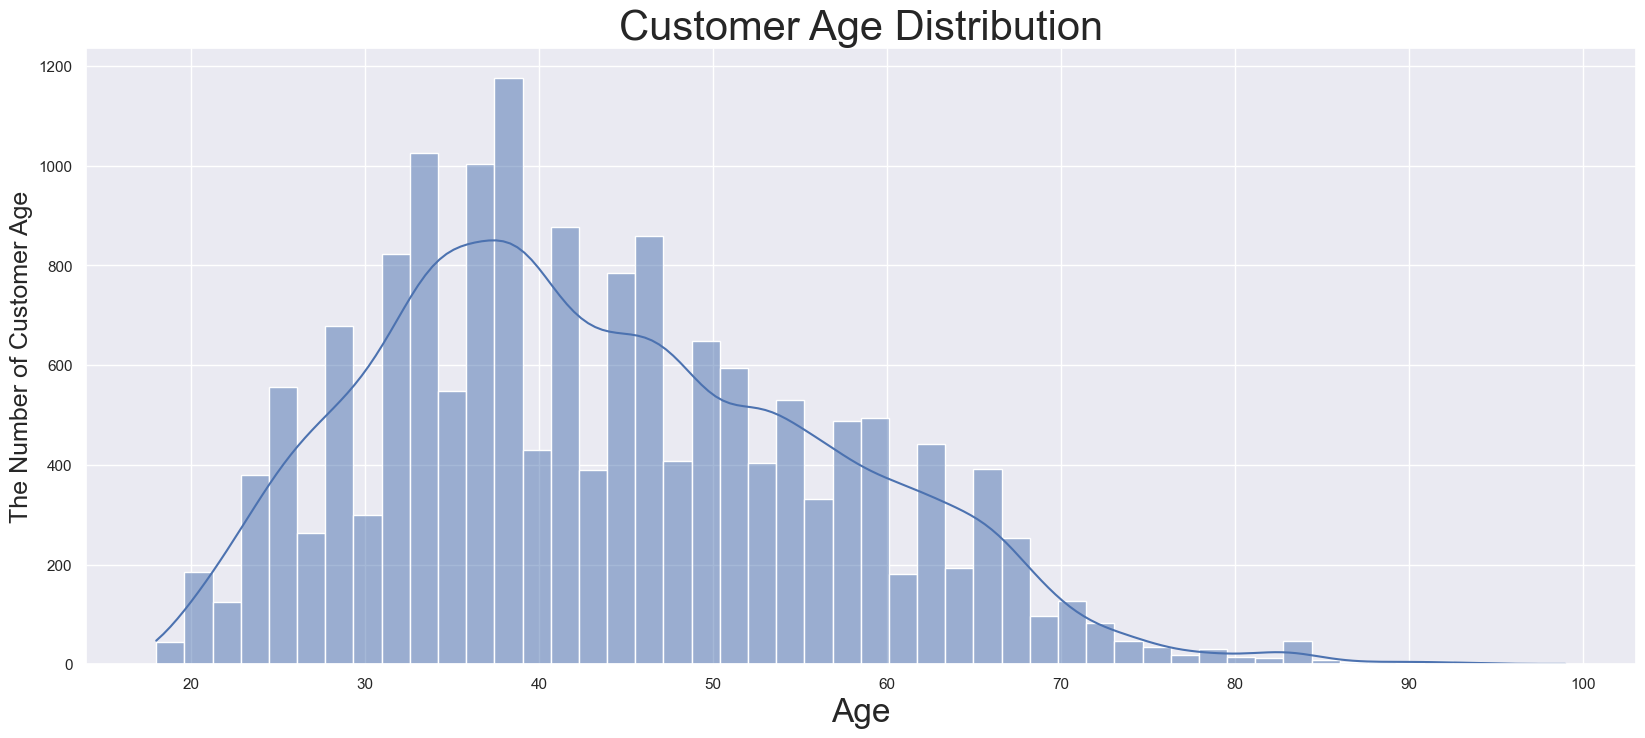

In [31]:
plt.figure(figsize = (20, 8))
plt.title('Customer Age Distribution', fontsize=30)
plt.xlabel("Age", fontsize=24)
plt.ylabel("The Number of Customer Age", fontsize=18)
sns.histplot(df, x='Age', kde = True, bins = 50)


In [32]:
df.corr()

/var/folders/81/x0sk2z191_q9tlrgm2hww4b80000gn/T/ipykernel_26178/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Clothing ID,Age,Rating,Recommended
Clothing ID,1.000000,0.045378,-0.069895,-0.055615
Age,0.045378,1.000000,0.045958,0.047297
Rating,-0.069895,0.045958,1.000000,0.784224
Recommended,-0.055615,0.047297,0.784224,1.000000


/var/folders/81/x0sk2z191_q9tlrgm2hww4b80000gn/T/ipykernel_26178/479196722.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


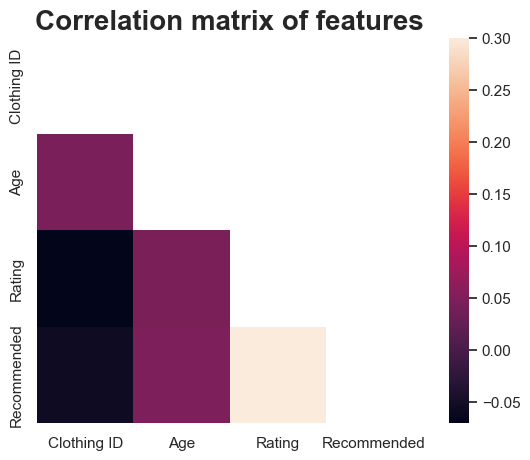

In [33]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True , cmap="rocket")
    plt.title("Correlation matrix of features",fontweight="bold",fontsize=20)

In [34]:
df.columns

Index(['Clothing ID', 'Age', 'Rating', 'Recommended', 'Division', 'Department',
       ' Product name'],
      dtype='object')

In [44]:
data_Rating=df.groupby(' Product name')[['Rating']].mean().sort_values(['Rating'],ascending=False).reset_index()

In [45]:
data_Rating.sort_values(['Rating'])

,Product name,Rating
19,Trend,3.773913
18,Dresses,3.818008
17,Knits,3.874412
16,Blouses,3.932999
15,Chemises,4.000000
14,Sweaters,4.011050
13,Fine gauge,4.103912
12,Skirts,4.113874
11,Pants,4.124769
10,Outerwear,4.143813


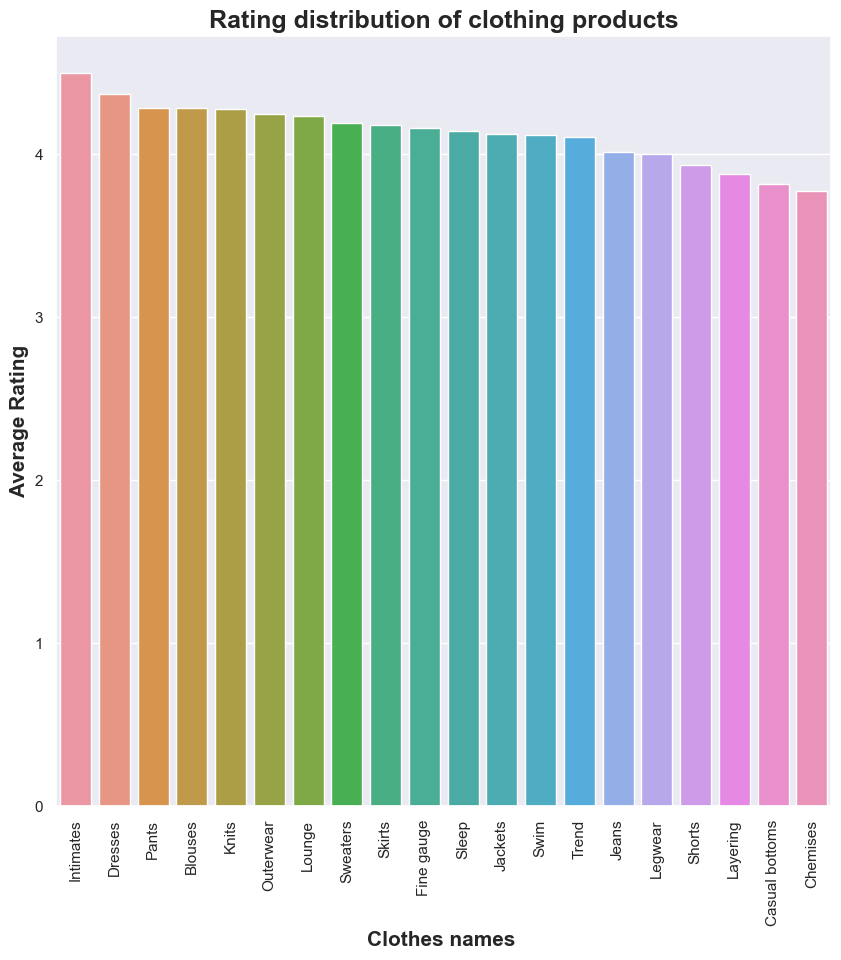

In [39]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
# make ScatterPlot to show Relationship between age and Product nam
sns.barplot(x=' Product name', y="Rating", data=data_Rating)
# set labels
plt.xlabel("Clothes names ",size=15 ,weight = 'bold')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', 'Chemises'])
plt.ylabel("Average Rating",size=15 ,weight = 'bold')
plt.title("Rating distribution of clothing products", size=18 ,weight = 'bold')
plt.show()

In [46]:
recommended = df[df['Recommended']==1]
not_recommended = df[df['Recommended']==0]

ValueError: could not convert string to float: 'Intimates'

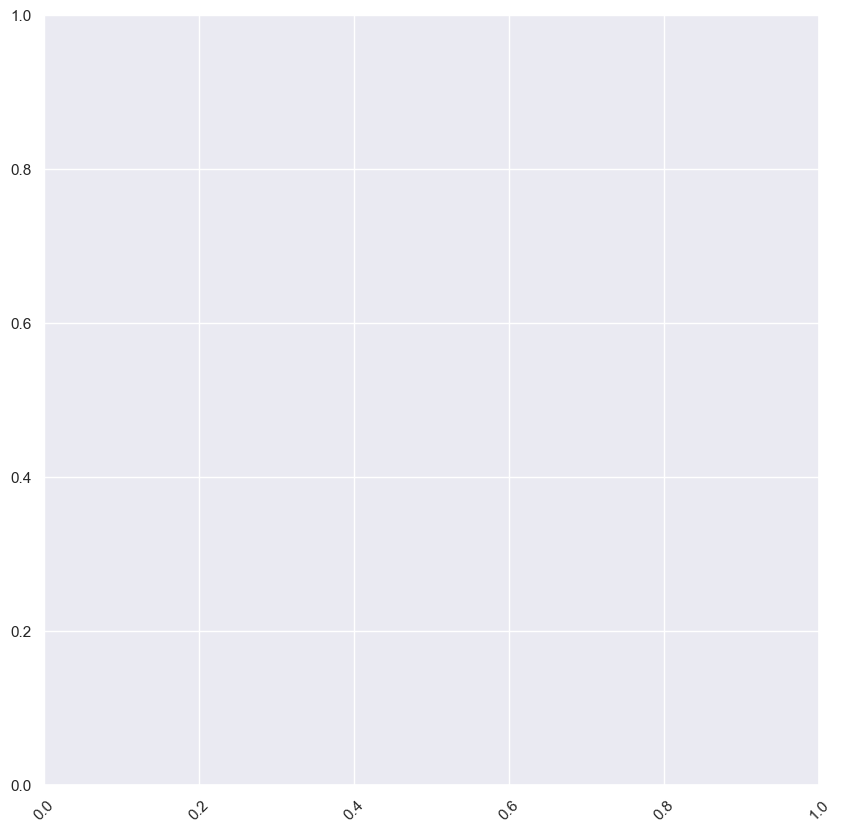

In [47]:
#ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
plt.figure(figsize=(10,10))
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(recommended[' Product name'], color="cyan", label = "Recommended")
ax3 = sns.countplot(not_recommended[' Product name'], color="blue",label = "Not Recommended")
ax3 = plt.title("Recommended Items in each Prodect name ")
ax3 = plt.legend()
#alpha = 0.8